<font size="7">__Breast Cancer Diagnostic__</font>

In [11]:
## Importing libraries

In [12]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn. decomposition import PCA
from sklearn import preprocessing
from sklearn. preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [13]:
## reading the data set

In [14]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", names = ['ID','diagnosis','radius mean','texture mean','perimeter mean','area mean','smoothness mean','compactness mean','Symmetry Mean','concavity mean','concave points mean','fractal dimension mean','radius se','texture se','perimeter se','area se','Smoothness Se','compactness se','concavity se','concave points se','symmetry se','fractal dimension se','radius worst','texture worst','Perimeter Worst','area worst','smoothness worst','compactness worst','concavity worst','concave points worst','symmetry worst','fractal dimension worst'])

In [15]:
df.head()

ID diagnosis  radius mean  texture mean  perimeter mean  area mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness mean  compactness mean  Symmetry Mean  concavity mean  ...  \
0          0.11840           0.27760         0.3001         0.14710  ...   
1          0.08474           0.07864         0.0869         0.07017  ...   
2          0.10960           0.15990         0.1974         0.12790  ...   
3          0.14250           0.28390         0.2414         0.10520  ...   
4          0.10030           0.13280         0.1980         0.10430  ...   

   radius worst  texture worst  Perimeter Worst  area worst  smoothness worst  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   compactness worst  concavity worst  concave points worst  symmetry worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal dimension worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 32 columns]

In [16]:
# Getting the info

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius mean              569 non-null    float64
 3   texture mean             569 non-null    float64
 4   perimeter mean           569 non-null    float64
 5   area mean                569 non-null    float64
 6   smoothness mean          569 non-null    float64
 7   compactness mean         569 non-null    float64
 8   Symmetry Mean            569 non-null    float64
 9   concavity mean           569 non-null    float64
 10  concave points mean      569 non-null    float64
 11  fractal dimension mean   569 non-null    float64
 12  radius se                569 non-null    float64
 13  texture se               569 non-null    float64
 14  perimeter se             5

In [18]:
# Checking the missing values by using isnull()

In [19]:
df.isnull().sum()

ID                         0
diagnosis                  0
radius mean                0
texture mean               0
perimeter mean             0
area mean                  0
smoothness mean            0
compactness mean           0
Symmetry Mean              0
concavity mean             0
concave points mean        0
fractal dimension mean     0
radius se                  0
texture se                 0
perimeter se               0
area se                    0
Smoothness Se              0
compactness se             0
concavity se               0
concave points se          0
symmetry se                0
fractal dimension se       0
radius worst               0
texture worst              0
Perimeter Worst            0
area worst                 0
smoothness worst           0
compactness worst          0
concavity worst            0
concave points worst       0
symmetry worst             0
fractal dimension worst    0
dtype: int64

In [20]:
# Describing the dataset

In [21]:
df.describe()

ID  radius mean  texture mean  perimeter mean    area mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness mean  compactness mean  Symmetry Mean  concavity mean  \
count       569.000000        569.000000     569.000000      569.000000   
mean          0.096360          0.104341       0.088799        0.048919   
std           0.014064          0.052813       0.079720        0.038803   
min           0.052630          0.019380       0.000000        0.000000   
25%           0.086370          0.064920       0.029560        0.020310   
50%           0.095870          0.092630       0.061540        0.033500   
75%           0.105300          0.130400       0.130700        0.074000   
max           0.163400          0.345400       0.426800        0.201200   

       concave points mean  ...  radius worst  texture worst  Perimeter Worst  \
count           569.000000  ...    569.000000     569.000000       569.000000   
mean              0.181162  ...     16.269190      25.677223       107.261213   
std               0.027414  ...      4.833242       6.146258        33.602542   
min               0.106000  ...      7.930000      12.020000        50.410000   
25%               0.161900  ...     13.010000      21.080000        84.110000   
50%               0.179200  ...     14.970000      25.410000        97.660000   
75%               0.195700  ...     18.790000      29.720000       125.400000   
max               0.304000  ...     36.040000      49.540000       251.200000   

        area worst  smoothness worst  compactness worst  concavity worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points worst  symmetry worst  fractal dimension worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [22]:
# Checking the value count for benign and malignant tumor 

In [23]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

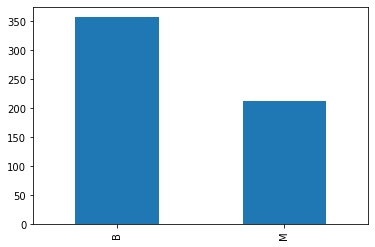

In [24]:
df['diagnosis'].value_counts().plot.bar()

In [25]:
# encoding the values for further analysis by using label encoder

In [26]:
label_encoder = preprocessing.LabelEncoder()
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])
df['diagnosis'].unique()

array([1, 0])

In [27]:
# Dropping the ID column as it is not useful for analysis

In [28]:
df.drop("ID", axis=1, inplace=True)

In [29]:
df.head()

diagnosis  radius mean  texture mean  perimeter mean  area mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness mean  compactness mean  Symmetry Mean  concavity mean  \
0          0.11840           0.27760         0.3001         0.14710   
1          0.08474           0.07864         0.0869         0.07017   
2          0.10960           0.15990         0.1974         0.12790   
3          0.14250           0.28390         0.2414         0.10520   
4          0.10030           0.13280         0.1980         0.10430   

   concave points mean  ...  radius worst  texture worst  Perimeter Worst  \
0               0.2419  ...         25.38          17.33           184.60   
1               0.1812  ...         24.99          23.41           158.80   
2               0.2069  ...         23.57          25.53           152.50   
3               0.2597  ...         14.91          26.50            98.87   
4               0.1809  ...         22.54          16.67           152.20   

   area worst  smoothness worst  compactness worst  concavity worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points worst  symmetry worst  fractal dimension worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [30]:
##Checking correlation

In [31]:
df.corr()

diagnosis  radius mean  texture mean  perimeter mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius mean               0.730029     1.000000      0.323782        0.997855   
texture mean              0.415185     0.323782      1.000000        0.329533   
perimeter mean            0.742636     0.997855      0.329533        1.000000   
area mean                 0.708984     0.987357      0.321086        0.986507   
smoothness mean           0.358560     0.170581     -0.023389        0.207278   
compactness mean          0.596534     0.506124      0.236702        0.556936   
Symmetry Mean             0.696360     0.676764      0.302418        0.716136   
concavity mean            0.776614     0.822529      0.293464        0.850977   
concave points mean       0.330499     0.147741      0.071401        0.183027   
fractal dimension mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius se                 0.567134     0.679090      0.275869        0.691765   
texture se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter se              0.556141     0.674172      0.281673        0.693135   
area se                   0.548236     0.735864      0.259845        0.744983   
Smoothness Se            -0.067016    -0.222600      0.006614       -0.202694   
compactness se            0.292999     0.206000      0.191975        0.250744   
concavity se              0.253730     0.194204      0.143293        0.228082   
concave points se         0.408042     0.376169      0.163851        0.407217   
symmetry se              -0.006522    -0.104321      0.009127       -0.081629   
fractal dimension se      0.077972    -0.042641      0.054458       -0.005523   
radius worst              0.776454     0.969539      0.352573        0.969476   
texture worst             0.456903     0.297008      0.912045        0.303038   
Perimeter Worst           0.782914     0.965137      0.358040        0.970387   
area worst                0.733825     0.941082      0.343546        0.941550   
smoothness worst          0.421465     0.119616      0.077503        0.150549   
compactness worst         0.590998     0.413463      0.277830        0.455774   
concavity worst           0.659610     0.526911      0.301025        0.563879   
concave points worst      0.793566     0.744214      0.295316        0.771241   
symmetry worst            0.416294     0.163953      0.105008        0.189115   
fractal dimension worst   0.323872     0.007066      0.119205        0.051019   

                         area mean  smoothness mean  compactness mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius mean               0.987357         0.170581          0.506124   
texture mean              0.321086        -0.023389          0.236702   
perimeter mean            0.986507         0.207278          0.556936   
area mean                 1.000000         0.177028          0.498502   
smoothness mean           0.177028         1.000000          0.659123   
compactness mean          0.498502         0.659123          1.000000   
Symmetry Mean             0.685983         0.521984          0.883121   
concavity mean            0.823269         0.553695          0.831135   
concave points mean       0.151293         0.557775          0.602641   
fractal dimension mean   -0.283110         0.584792          0.565369   
radius se                 0.732562         0.301467          0.497473   
texture se               -0.066280         0.068406          0.046205   
perimeter se              0.726628         0.296092          0.548905   
area se                   0.800086         0.246552          0.455653   
Smoothness Se            -0.166777         0.332375          0.135299   
compactness se            0.212583         0.318943          0.738722   
concavity se              0.207660         0.248396          0.570517   
concave points se         0.372320         0.

In [32]:
## Plotting Correlation

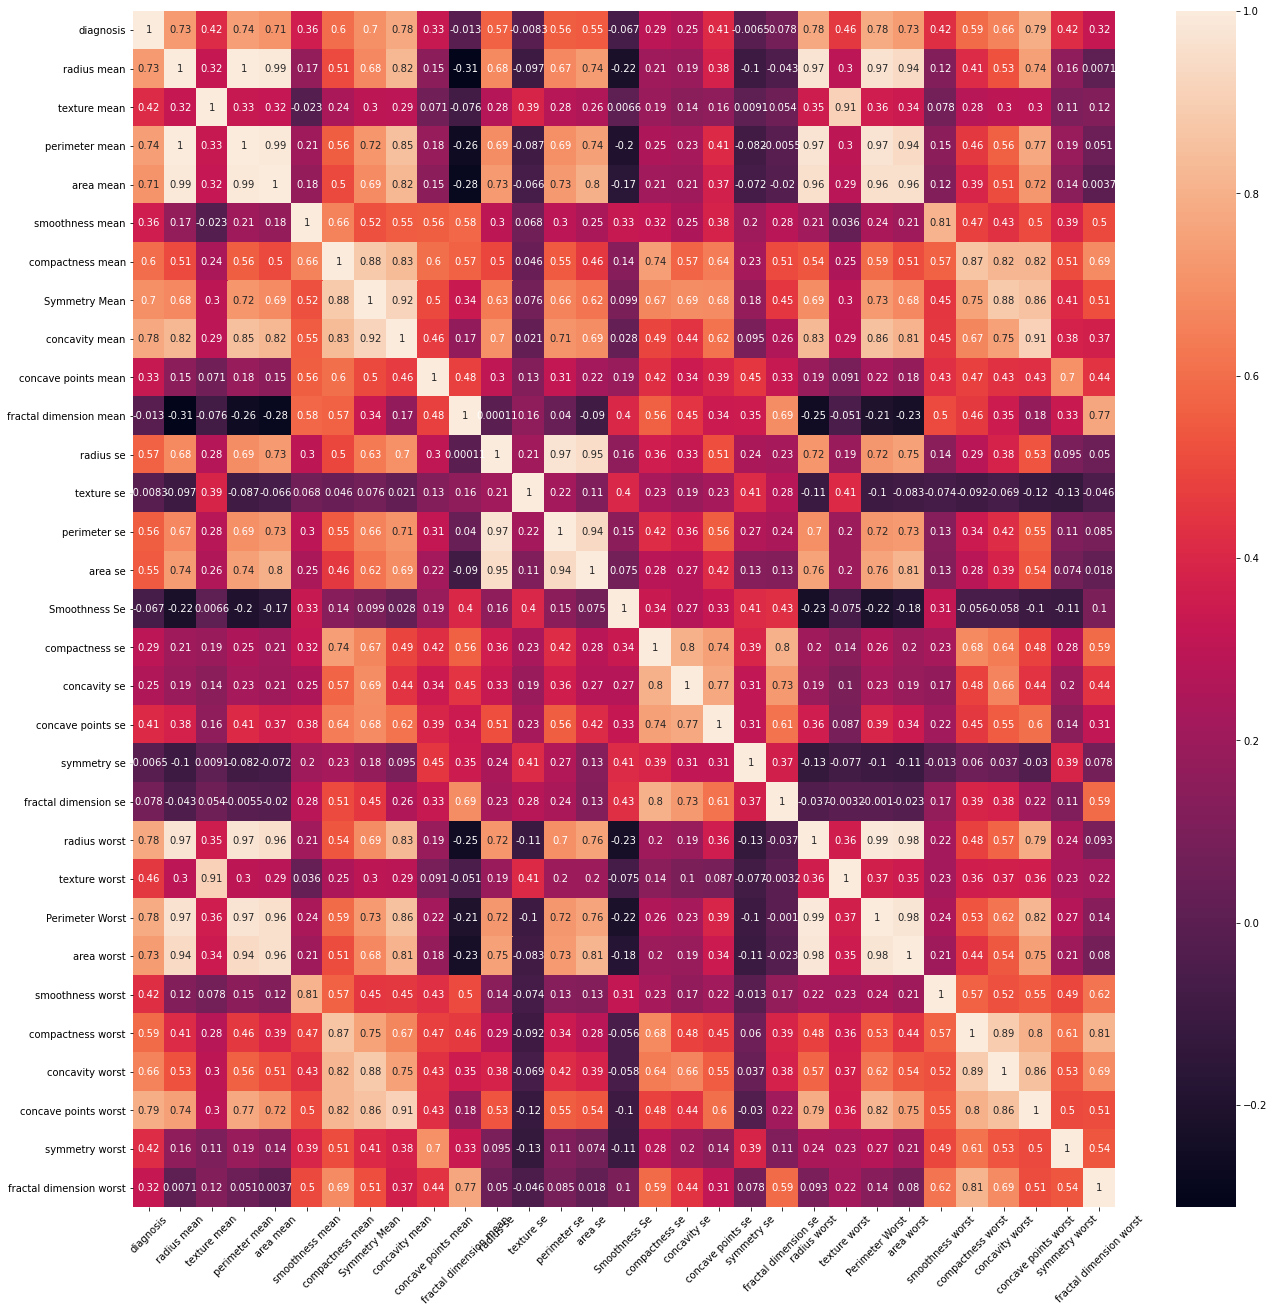

In [33]:
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(), annot= True)
plt.xticks(rotation=45)
plt.show()

<font size="5">__VISUALIZATION :__</font>

In [34]:
#Splitting the dataset into X and y 
y=df['diagnosis']
x=df.drop('diagnosis',axis=1)

In [35]:
#standardizating features i.e x variable

In [36]:
x1 = (x - x.mean()) / (x.std())            
data = pd.concat([y,x1],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

In [37]:
#Violin PLot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'radius mean'),
  Text(1, 0, 'texture mean'),
  Text(2, 0, 'perimeter mean'),
  Text(3, 0, 'area mean'),
  Text(4, 0, 'smoothness mean'),
  Text(5, 0, 'compactness mean'),
  Text(6, 0, 'Symmetry Mean'),
  Text(7, 0, 'concavity mean'),
  Text(8, 0, 'concave points mean'),
  Text(9, 0, 'fractal dimension mean'),
  Text(10, 0, 'radius se'),
  Text(11, 0, 'texture se'),
  Text(12, 0, 'perimeter se'),
  Text(13, 0, 'area se'),
  Text(14, 0, 'Smoothness Se'),
  Text(15, 0, 'compactness se'),
  Text(16, 0, 'concavity se'),
  Text(17, 0, 'concave points se'),
  Text(18, 0, 'symmetry se'),
  Text(19, 0, 'fractal dimension se'),
  Text(20, 0, 'radius worst'),
  Text(21, 0, 'texture worst'),
  Text(22, 0, 'Perimeter Worst'),
  Text(23, 0, 'area worst'),
  Text(24, 0, 'smoothness worst'),
  Text(25, 0, 'compactness worst'),
  Text(26, 0, 'concavity 

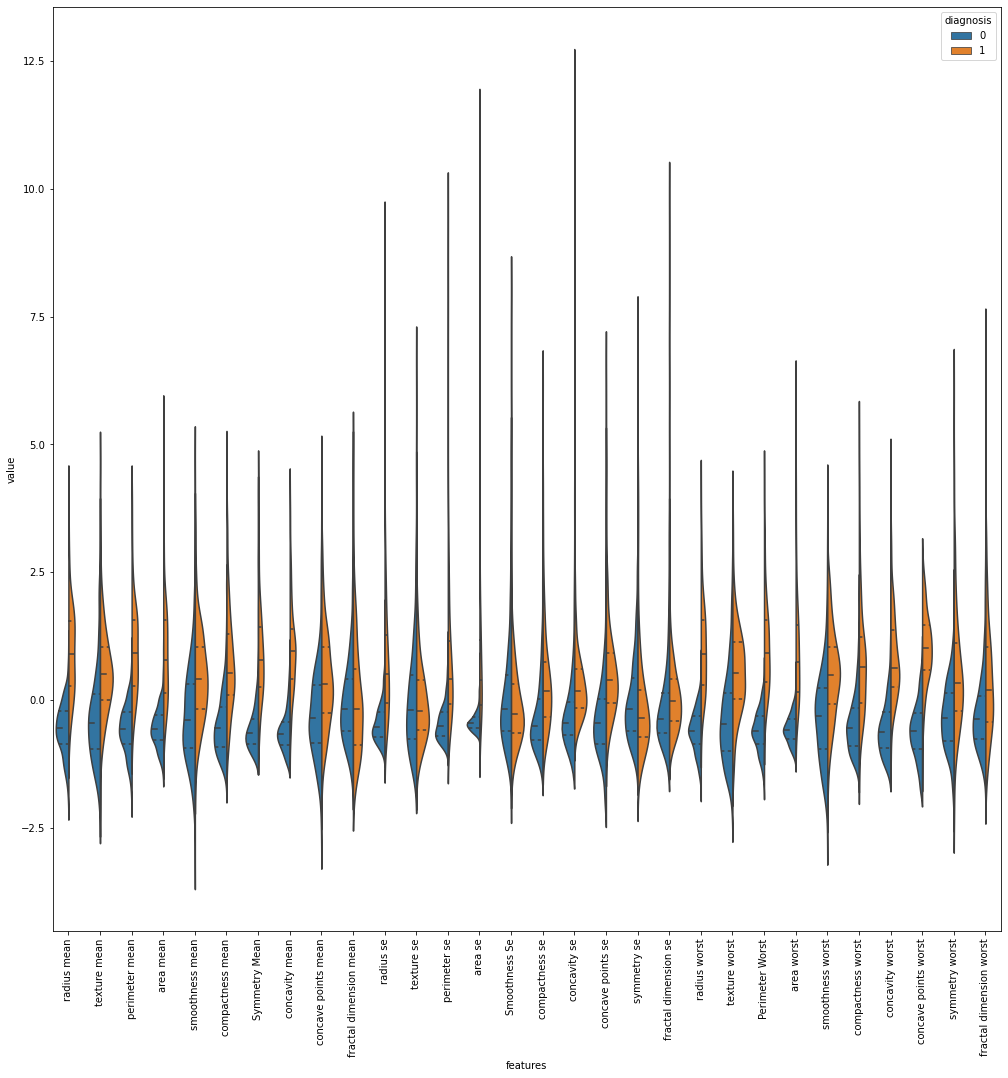

In [38]:
plt.figure(figsize=(17,17))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [39]:
## Box plot for checking outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'radius mean'),
  Text(1, 0, 'texture mean'),
  Text(2, 0, 'perimeter mean'),
  Text(3, 0, 'area mean'),
  Text(4, 0, 'smoothness mean'),
  Text(5, 0, 'compactness mean'),
  Text(6, 0, 'Symmetry Mean'),
  Text(7, 0, 'concavity mean'),
  Text(8, 0, 'concave points mean'),
  Text(9, 0, 'fractal dimension mean'),
  Text(10, 0, 'radius se'),
  Text(11, 0, 'texture se'),
  Text(12, 0, 'perimeter se'),
  Text(13, 0, 'area se'),
  Text(14, 0, 'Smoothness Se'),
  Text(15, 0, 'compactness se'),
  Text(16, 0, 'concavity se'),
  Text(17, 0, 'concave points se'),
  Text(18, 0, 'symmetry se'),
  Text(19, 0, 'fractal dimension se'),
  Text(20, 0, 'radius worst'),
  Text(21, 0, 'texture worst'),
  Text(22, 0, 'Perimeter Worst'),
  Text(23, 0, 'area worst'),
  Text(24, 0, 'smoothness worst'),
  Text(25, 0, 'compactness worst'),
  Text(26, 0, 'concavity 

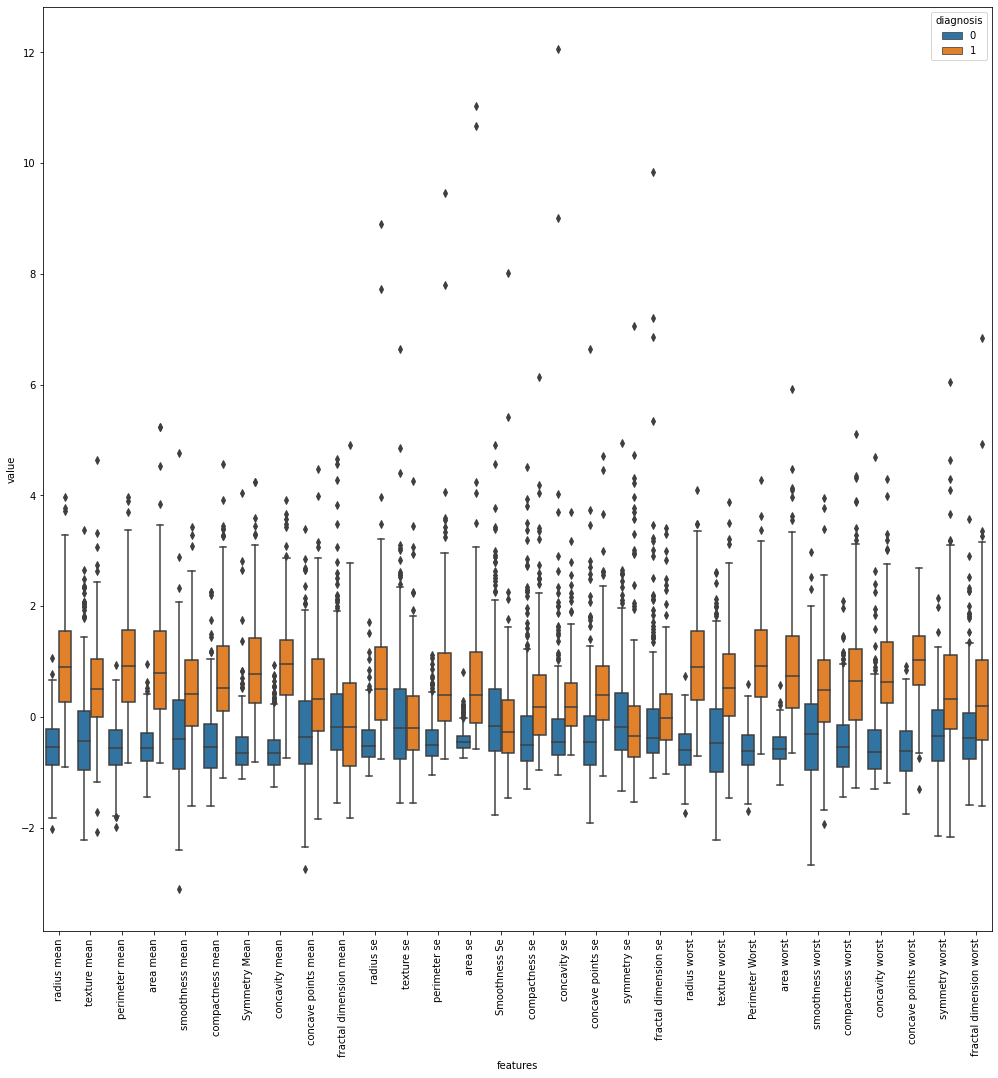

In [40]:
plt.figure(figsize=(17,17))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

In [41]:
## Density plot : getting sense of the data distribution 

In [42]:
df.plot(kind='density', subplots=True, layout=(3,5), sharex=False, legend=False, fontsize=1)
plt.show()

ValueError: Layout of 3x5 must be larger than required size 31

<Figure size 432x288 with 0 Axes>

In [43]:
## Pair Grid plot

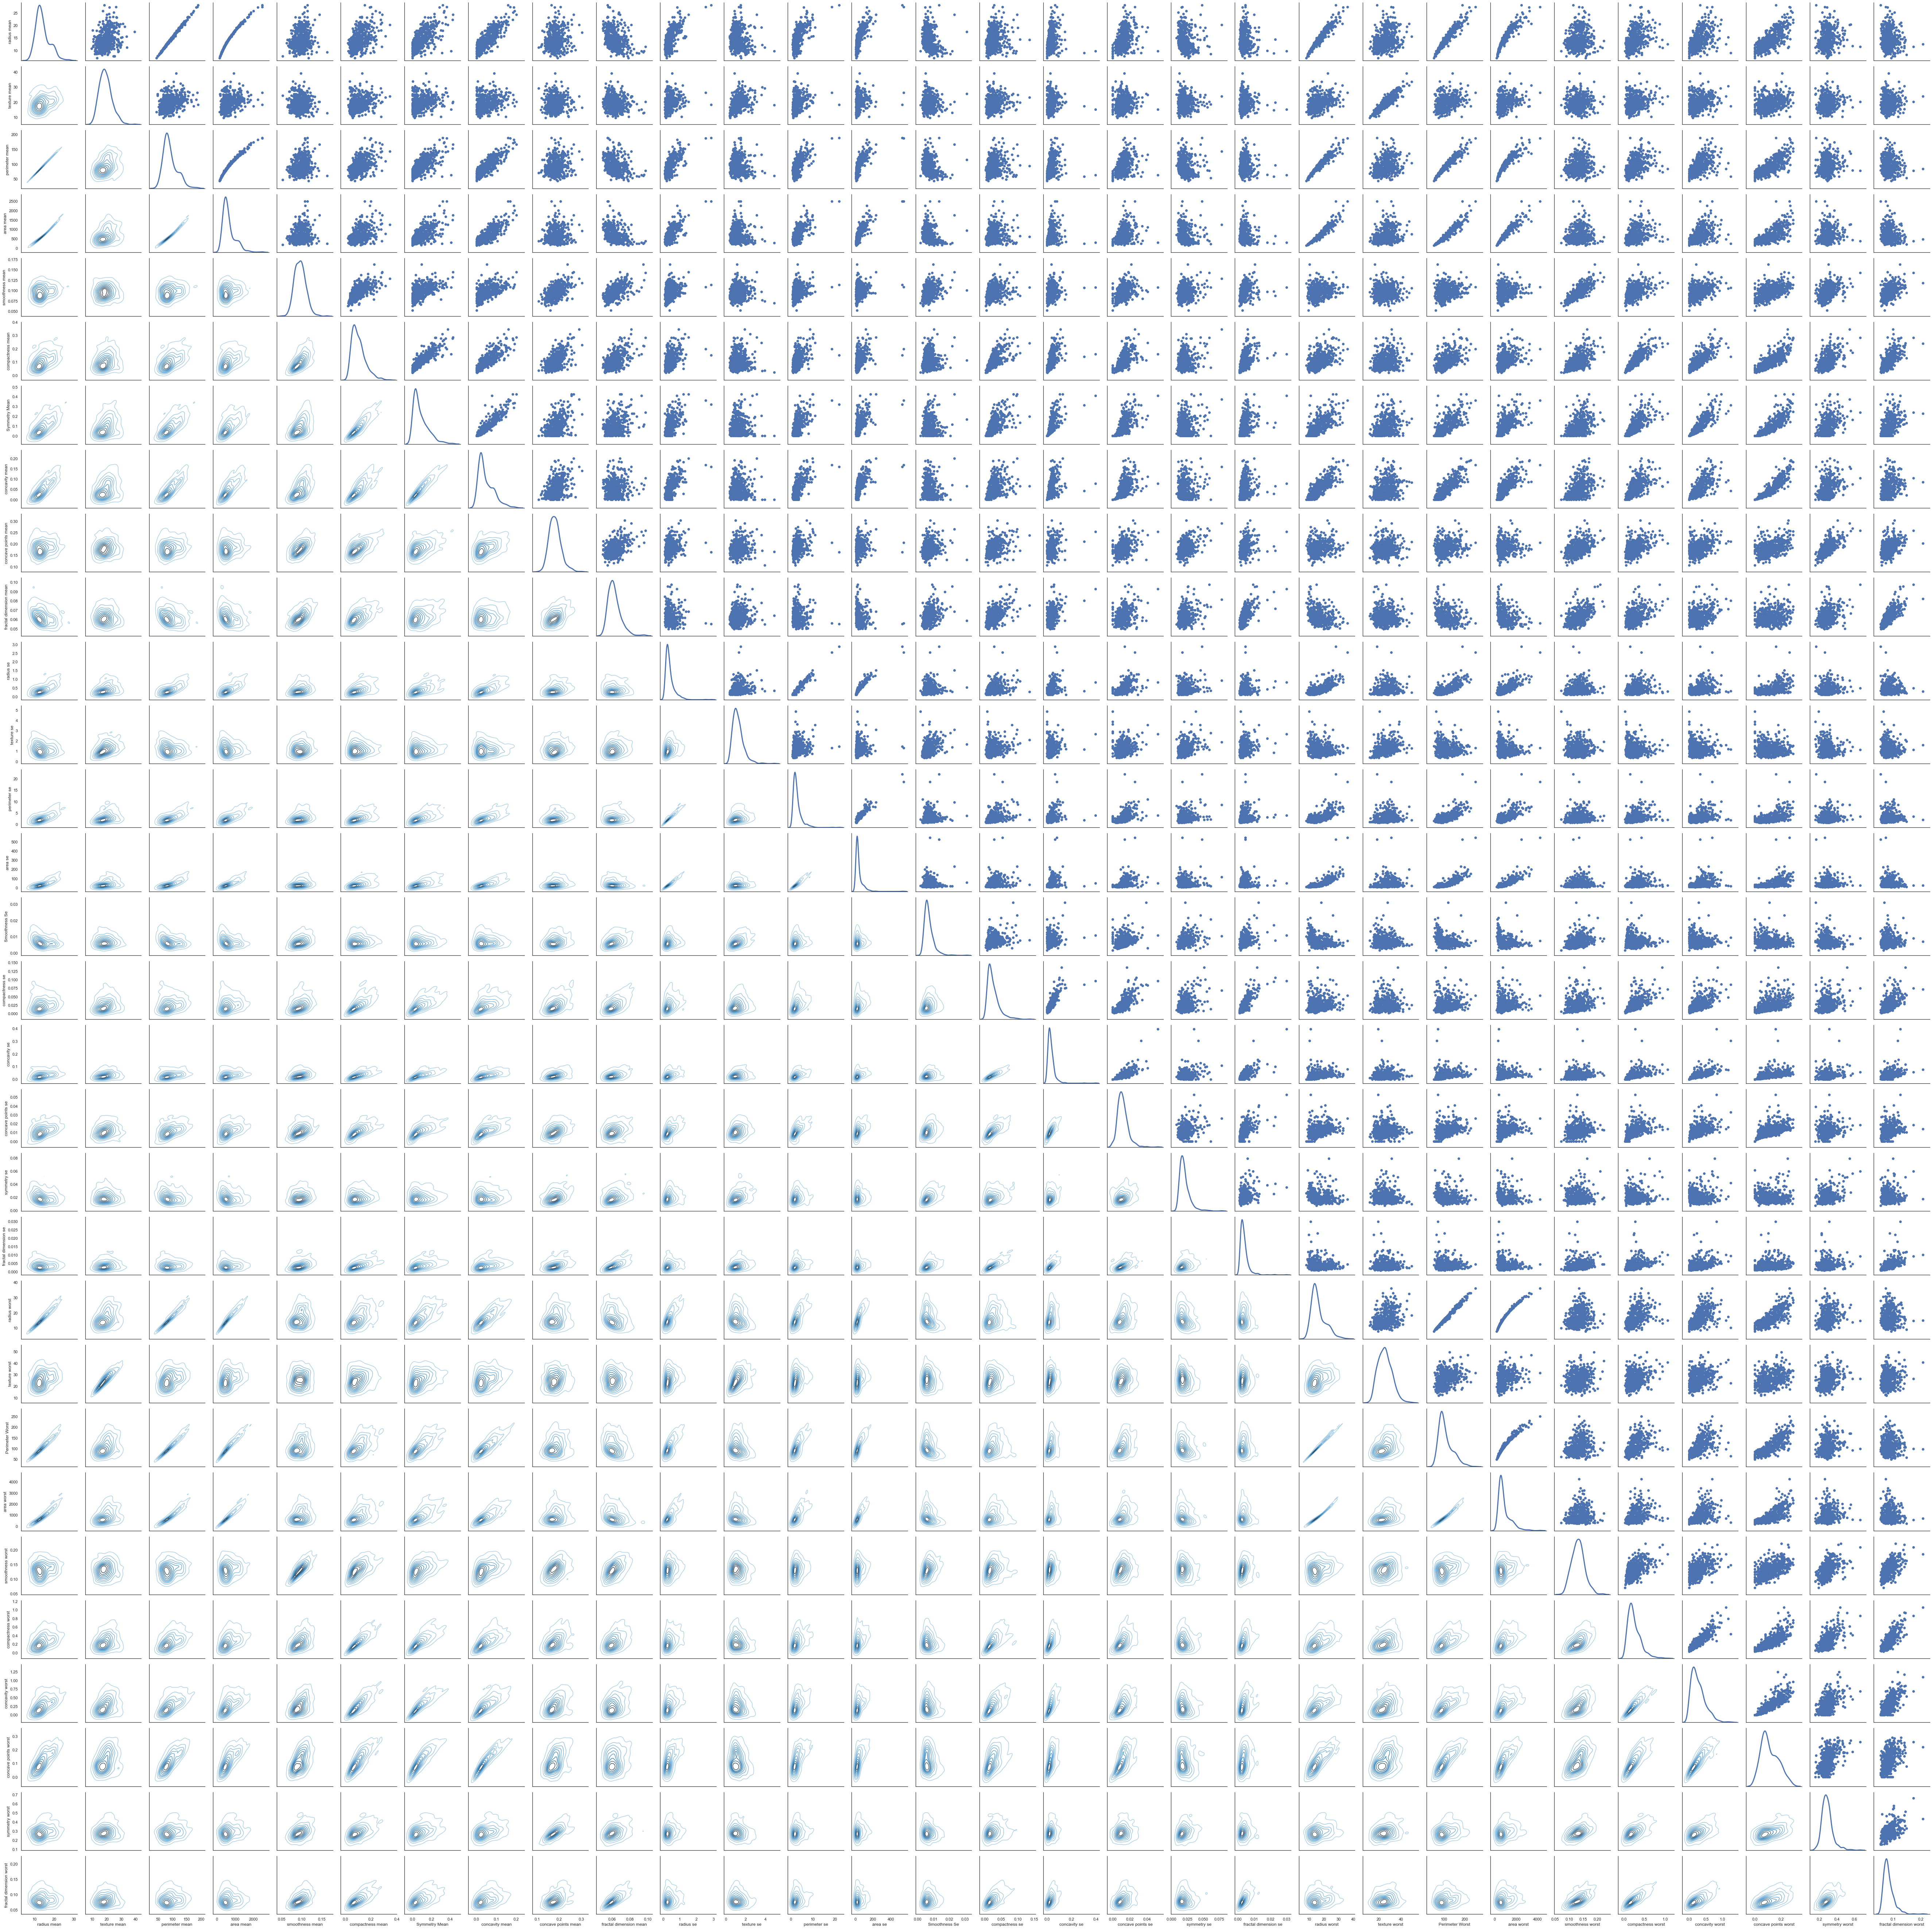

In [44]:
sns.set(style="white")
g = sns.PairGrid(x, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

<font size="5">__Modeling :__</font>

In [45]:
#Creating independent and dependent variables.

In [46]:
# Create training and test split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state= 1)

In [48]:
# performing preprocessing part by scaling

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [50]:
#Dimensionality reduction by applying PCA function on training and testing set of X component

In [51]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
 


In [52]:
# explained_variance : ratio of variance (eigenvalue / total eigenvalues)

In [53]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.44630507, 0.18220435])

Text(0, 0.5, 'explained_variance_ratio_')

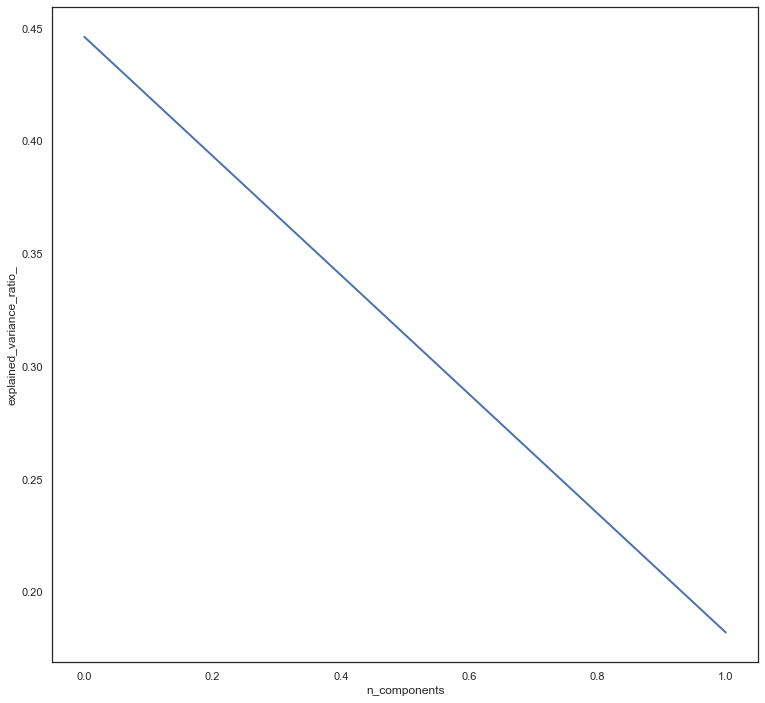

In [54]:
plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [55]:
#Cumulative sum of eigenvalues is used to create step plot for visualizing the variance explained by each principal component.

In [56]:
cum_sum_eigenvalues = np.cumsum(explained_variance)

In [57]:
# Creating the Step plot

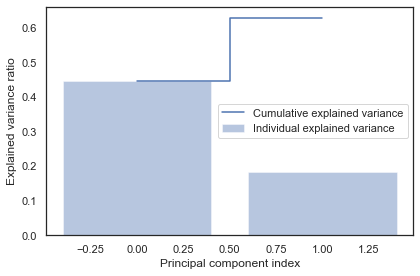

In [58]:

plt.bar(range(0,len(explained_variance)), explained_variance, alpha=0.4, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<font size="5">__LOGISTIC REGRESSION :__</font>

In [59]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [60]:
# Predicting the test set result using LogisticRegression

In [61]:
y_pred = lr.predict(x_test)

In [62]:
#Plotting confusion matrix between test set of Y and predicted value

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

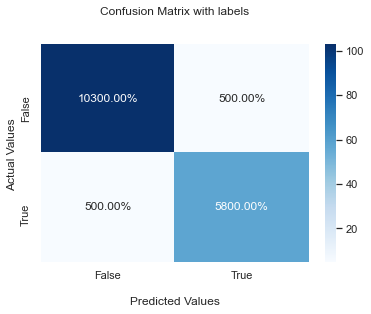

In [64]:
ax = sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [65]:
##Classification report is one of the performance evaluation metrics of a classification-based machine learning model. 
##It displays your model’s precision, recall, F1 score and support.
##It provides a better understanding of the overall performance of our trained model

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       108
           1       0.92      0.92      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [67]:
##Accuracy score represents the ratio of the sum of true positive and true negatives out of all the predictions.

In [68]:
acc=accuracy_score(y_test, y_pred)
print('The accuracy for logistic regression is =', acc*100)

The accuracy for logistic regression is = 94.15204678362574


In [69]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)
print("roc_auc score for logistic regression model is :", auc)

roc_auc score for logistic regression model is : 0.9371693121693121


In [70]:
print(confusion_matrix(y_test, y_pred))

[[103   5]
 [  5  58]]


In [71]:
pre=metrics.precision_score(y_test,y_pred)
print("precision:",pre*100)

precision: 92.06349206349206


In [72]:
f1S = metrics.f1_score(y_test,y_pred)
print("F1 score is:",f1S*100)

F1 score is: 92.06349206349206


In [178]:
from sklearn.metrics import mean_squared_error


In [184]:
rmse=mean_squared_error(y_test, y_pred)
print("rmse for Logistic regression model is :",rmse*100)

rmse for Logistic regression model is : 5.847953216374268


<font size="5">__Random Forest__:</font>

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [74]:
y_pred1 = rfc.predict(x_test)

In [75]:
acc1=accuracy_score(y_test, y_pred1)
print('The accuracy is for random forest is =', acc1*100)

The accuracy is for random forest is = 91.81286549707602


In [76]:
##Classification report of Random forest

In [77]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.89      0.89      0.89        63

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



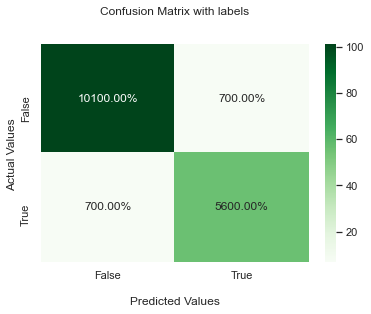

In [78]:
cm1 = confusion_matrix(y_test,y_pred1)
ax = sns.heatmap(cm1, annot=True, fmt='.2%', cmap='Greens')
ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [79]:
from sklearn import metrics
auc1 = metrics.roc_auc_score(y_test, y_pred1)
print("roc_auc score for random forest model is :", auc1)

roc_auc score for random forest model is : 0.9120370370370371


In [80]:
pre1=metrics.precision_score(y_test,y_pred1)
print("precision:",pre1*100)

precision: 88.88888888888889


In [81]:
f1S1 = metrics.f1_score(y_test,y_pred1)
print("F1 score is:",f1S1*100)

F1 score is: 88.88888888888889


In [186]:
rmse1=mean_squared_error(y_test, y_pred1)
print("rmse for RF is :",rmse1*100)

rmse for RF is : 8.187134502923977


<font size="5">__SVM__</font>

In [82]:
from sklearn.svm import SVC

In [83]:
SVM = SVC()
SVM.fit(x_train, y_train)
y_pred2= SVM.predict(x_test)
acc2=accuracy_score(y_test, y_pred2)
print("The Accuracy is :",acc2*100)


The Accuracy is : 92.98245614035088


In [84]:
pre2=metrics.precision_score(y_test,y_pred2)
print("precision:",pre2*100)

precision: 91.80327868852459


In [85]:
f1S2 = metrics.f1_score(y_test,y_pred2)
print("F1 score is:",f1S2*100)

F1 score is: 90.32258064516128


In [86]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       108
           1       0.92      0.89      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



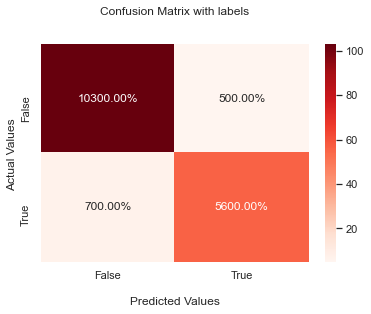

In [87]:
cm2=confusion_matrix(y_test, y_pred2)
ax = sns.heatmap(cm2, annot=True, fmt='.2%', cmap='Reds')
ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [88]:
from sklearn import metrics
auc2 = metrics.roc_auc_score(y_test, y_pred)
print("roc_auc score for SVM model is :", auc2)

roc_auc score for SVM model is : 0.9371693121693121


In [189]:
rmse2=mean_squared_error(y_test, y_pred2)
print("rmse for SVC is :",rmse2*100)

rmse for SVC is : 7.017543859649122


<font size="5">__KNN__</font>

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn=KNeighborsClassifier(n_neighbors=8).fit(x_train,y_train)
y_pred3=knn.predict(x_test)
acc3=metrics.accuracy_score(y_test,y_pred3)
print("The Accuracy is :",acc3*100)

The Accuracy is : 95.32163742690058


In [91]:
pre3=metrics.precision_score(y_test,y_pred3)
print("precision:",pre3*100)

precision: 95.08196721311475


In [92]:
f1S3 = metrics.f1_score(y_test,y_pred3)
print("F1 score is:",f1S3*100)

F1 score is: 93.54838709677418


In [93]:
auc3 = metrics.roc_auc_score(y_test, y_pred3)
print("roc_auc score for SVM model is :", auc3*100)

roc_auc score for SVM model is : 94.64285714285714


In [94]:
print(classification_report(y_test, y_pred3))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [193]:
rmse3=mean_squared_error(y_test, y_pred3)
print("rmse for KNN is :",rmse3*100)

rmse for KNN is : 4.678362573099415


<font size="5">__DECISION TREE__</font>

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dl=DecisionTreeClassifier().fit(x_train,y_train)

In [97]:
y_pred4=dl.predict(x_test)
acc4=metrics.accuracy_score(y_test,y_pred4)
print("The Accuracy is :",acc4*100)

The Accuracy is : 92.39766081871345


In [98]:
pre4=metrics.precision_score(y_test,y_pred4)
print("precision:",pre4*100)

precision: 90.32258064516128


In [99]:
f1S4 = metrics.f1_score(y_test,y_pred4)
print("F1 score is:",f1S4*100)

F1 score is: 89.6


In [100]:
auc4 = metrics.roc_auc_score(y_test, y_pred4)
print("roc_auc score for SVM model is :", auc4*100)

roc_auc score for SVM model is : 91.66666666666666


In [101]:
print(classification_report(y_test, y_pred4))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.90      0.89      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [197]:
rmse4=mean_squared_error(y_test, y_pred4)
rmse4
print("rmse for DT is :",rmse4*100)

rmse for DT is : 7.602339181286549


<font size="5">__XGBOOST__</font>

In [102]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [103]:
import xgboost  
from xgboost import XGBClassifier

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/mrinalpatil/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/mrinalpatil/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]


In [ ]:
xgb_clr = XGBClassifier()
xgb_clr.fit(x_train, y_train)
y_pred3 = xgb_clr.predict(x_test)
accuracy_score(y_test, y_pred3)

In [104]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred3))
print("precision:",metrics.precision_score(y_test,y_pred3))

accuracy: 0.9532163742690059
precision: 0.9508196721311475


In [105]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



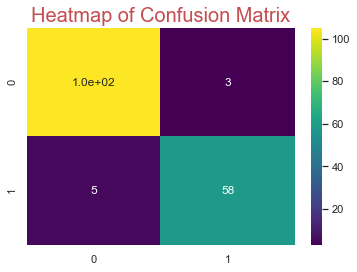

In [106]:
print(classification_report(y_test, y_pred3))
confusion_matrix = confusion_matrix(y_test, y_pred3)
plt.title('Heatmap of Confusion Matrix', fontsize = 20,c='r')
sns.heatmap(confusion_matrix, annot = True,cmap='viridis')
plt.show()

<font size="5">__Hyperparameter Tuning by implementing Grid Search Algorithm__</font>

In [107]:
from  sklearn.model_selection import GridSearchCV

In [108]:
model = RandomForestClassifier()


In [109]:
# Tunning Params

In [110]:

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }

In [111]:
# Implementing GridSearchCV for 10 Cross-Validation

In [112]:
gsc = GridSearchCV(model, param_grid, cv=10)  

gsc.fit(x_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9523076923076923

 Best Estinator is 
RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=7)

 Best Parametes are
{'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7}


<font size="5">__Feature Selection__</font>

In [116]:
model = RandomForestClassifier()
model.fit(x, y)
importance = model.feature_importances_
# summarize feature importance
for i,f in enumerate(importance):
    print('Feature: %d, Score: %.3f' % (i,f))


Feature: 0, Score: 0.038
Feature: 1, Score: 0.014
Feature: 2, Score: 0.032
Feature: 3, Score: 0.039
Feature: 4, Score: 0.005
Feature: 5, Score: 0.010
Feature: 6, Score: 0.032
Feature: 7, Score: 0.102
Feature: 8, Score: 0.004
Feature: 9, Score: 0.004
Feature: 10, Score: 0.012
Feature: 11, Score: 0.006
Feature: 12, Score: 0.010
Feature: 13, Score: 0.023
Feature: 14, Score: 0.005
Feature: 15, Score: 0.006
Feature: 16, Score: 0.006
Feature: 17, Score: 0.005
Feature: 18, Score: 0.005
Feature: 19, Score: 0.005
Feature: 20, Score: 0.131
Feature: 21, Score: 0.019
Feature: 22, Score: 0.150
Feature: 23, Score: 0.135
Feature: 24, Score: 0.019
Feature: 25, Score: 0.008
Feature: 26, Score: 0.036
Feature: 27, Score: 0.121
Feature: 28, Score: 0.010
Feature: 29, Score: 0.010


In [117]:
# plot feature importance

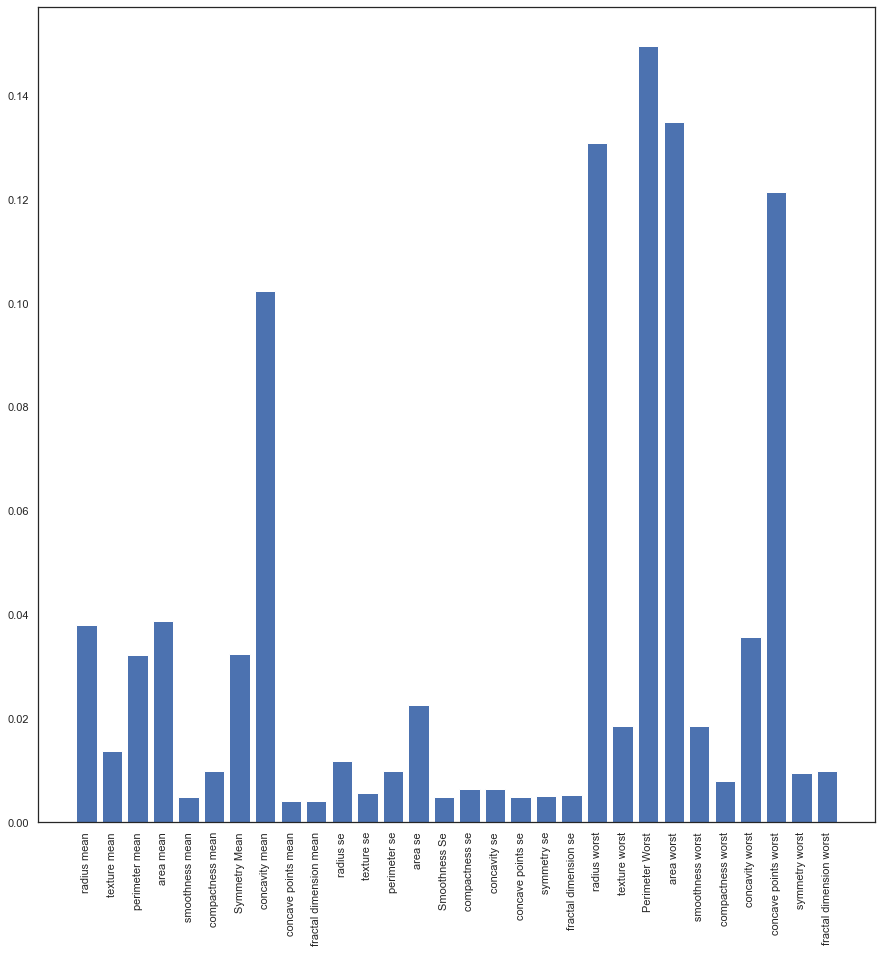

In [118]:

plt.figure(figsize=(15,15))
plt.bar(x.columns, importance)
plt.xticks(rotation=90)
plt.show()

#Here the least important features are - radius mean, texture mean, smoothness mean, compactness mean, concave points mean, fractal dimension mean,
#texture se, perimeter se, smoothness se, compactness se, concavity se, concave points, symmetry,texture worst, 
#smoothness worst,compactness worst, symmetry worst and fractal dimension worst.

#So dropping them and again checking the accuracy.

In [119]:
Columns = cols = ['smoothness mean','compactness mean','concave points mean','radius se','texture se','perimeter se','compactness worst','fractal dimension mean','Smoothness Se','compactness se','concavity se','concave points se','symmetry se','fractal dimension se','texture worst','smoothness worst','symmetry worst','fractal dimension worst']
df1 = df.drop(cols, axis=1)

In [120]:
df1.head()

diagnosis  radius mean  texture mean  perimeter mean  area mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   Symmetry Mean  concavity mean  area se  radius worst  Perimeter Worst  \
0         0.3001         0.14710   153.40         25.38           184.60   
1         0.0869         0.07017    74.08         24.99           158.80   
2         0.1974         0.12790    94.03         23.57           152.50   
3         0.2414         0.10520    27.23         14.91            98.87   
4         0.1980         0.10430    94.44         22.54           152.20   

   area worst  concavity worst  concave points worst  
0      2019.0           0.7119                0.2654  
1      1956.0           0.2416                0.1860  
2      1709.0           0.4504                0.2430  
3       567.7           0.6869                0.2575  
4      1575.0           0.4000                0.1625

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             569 non-null    int64  
 1   radius mean           569 non-null    float64
 2   texture mean          569 non-null    float64
 3   perimeter mean        569 non-null    float64
 4   area mean             569 non-null    float64
 5   Symmetry Mean         569 non-null    float64
 6   concavity mean        569 non-null    float64
 7   area se               569 non-null    float64
 8   radius worst          569 non-null    float64
 9   Perimeter Worst       569 non-null    float64
 10  area worst            569 non-null    float64
 11  concavity worst       569 non-null    float64
 12  concave points worst  569 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 57.9 KB


In [122]:
X=df1.drop('diagnosis',axis=1)
Y=df1['diagnosis']

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state= 1)

In [124]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [125]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 


In [126]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [127]:
Y_pred = lr.predict(X_test)

In [128]:
ACC=accuracy_score(Y_test, Y_pred)
print('The accuracy for logistic regression is =', ACC*100)

The accuracy for logistic regression is = 92.98245614035088


In [129]:
from sklearn import metrics
AUC = metrics.roc_auc_score(Y_test, Y_pred)
print("roc_auc score for logistic regression model is :", AUC*100)

roc_auc score for logistic regression model is : 92.46031746031746


In [130]:
### There was decrease in accuracy after the feature selection


In [131]:
from tabulate import tabulate

In [194]:
table = [['Model', 'Accuracy Score','ROC_AUC SCORE','Precision Score','F1 Score','RMSE'], ['LOGISTIC REGRESSION', acc*100, auc*100, pre*100,f1S*100,rmse*100], ['RANDOM FOREST', acc1*100, auc1*100,pre1*100,f1S1*100,rmse1*100], ['SVM', acc2*100, auc2*100,pre2*100,f1S2*100,rmse2*100],['KNN', acc3*100, auc3*100, pre3*100,f1S3*100,rmse3*100],['DECISION TREE', acc4*100, auc4*100, pre4*100,f1S4*100,rmse4*100]]
print(tabulate(table, headers = "firstrow" ))

Model                  Accuracy Score    ROC_AUC SCORE    Precision Score    F1 Score     RMSE
-------------------  ----------------  ---------------  -----------------  ----------  -------
LOGISTIC REGRESSION           94.152           93.7169            92.0635     92.0635  5.84795
RANDOM FOREST                 91.8129          91.2037            88.8889     88.8889  8.18713
SVM                           92.9825          93.7169            91.8033     90.3226  7.01754
KNN                           95.3216          94.6429            95.082      93.5484  4.67836
DECISION TREE                 92.3977          91.6667            90.3226     89.6     7.60234


<font size="5">__Model Stacking__</font>

In [134]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [171]:

#specifying the initial learners
model1 = RandomForestClassifier()
model2 = LogisticRegression()
model3 = SVC()
model4= KNeighborsClassifier()
model5= AdaBoostClassifier()
model6=GradientBoostingClassifier()

#training the initial learners
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model5.fit(x_train,y_train)
model6.fit(x_train,y_train)

GradientBoostingClassifier()

In [172]:
#making predictions for the validation data
pred1 = model1.predict(x_train)
pred2 = model2.predict(x_train)
pred3 = model3.predict(x_train)
pred4 = model4.predict(x_train)
pred5 = model5.predict(x_train)
pred6 = model6.predict(x_train)

#making predictions for the test data
test_pred1 = model1.predict(x_test)
test_pred2 = model2.predict(x_test)
test_pred3 = model3.predict(x_test)
test_pred4 = model4.predict(x_test)
test_pred5 = model5.predict(x_test)
test_pred6 = model6.predict(x_test)

In [173]:
#making a new dataset for training our final model by stacking the predictions on the validation data
train_stack = np.column_stack((pred1,pred2,pred3,pred4,pred5,pred6))

#making the final test set for our final model by stacking the predictions on the test data
test_stack = np.column_stack((test_pred1,test_pred2,test_pred3,test_pred4,test_pred5,test_pred6))

In [174]:
final_model = RandomForestClassifier()

#training the final model on the stacked predictions
final_model.fit(train_stack,y_train)

RandomForestClassifier()

In [175]:
final_predictions = final_model.predict(test_stack)

In [177]:
print("accuracy:",metrics.accuracy_score(y_test,final_predictions)*100)

accuracy: 93.56725146198829
